In [15]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt


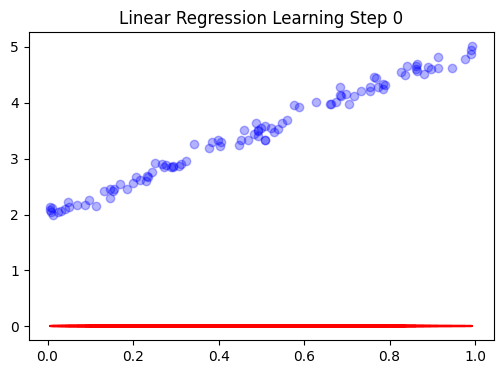

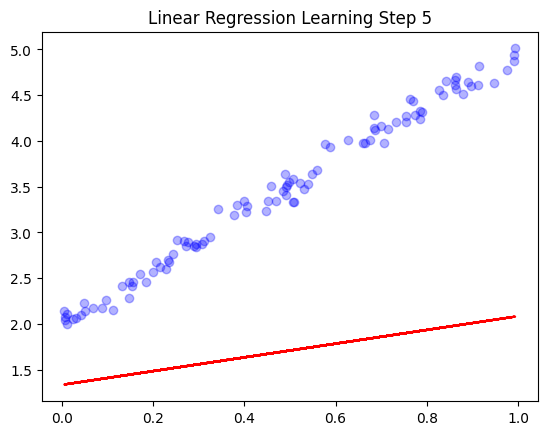

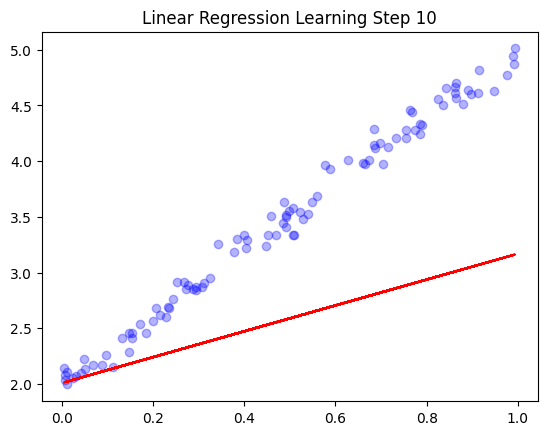

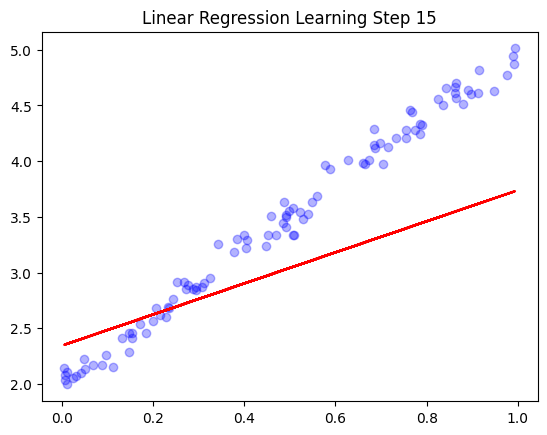

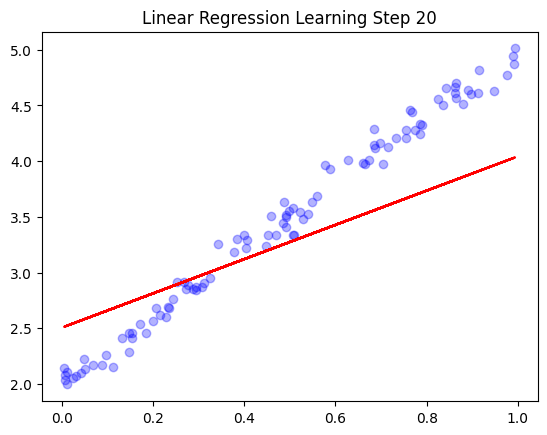

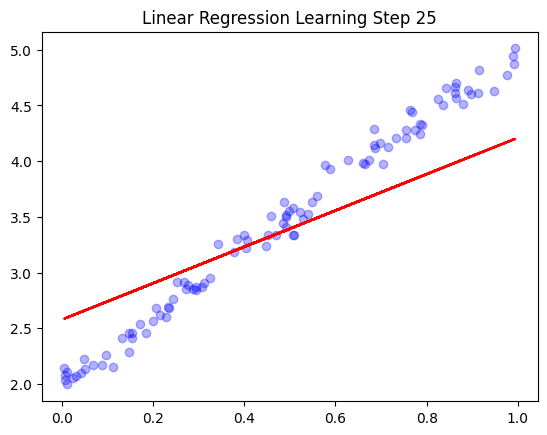

In [16]:
# Step 2: Create data for linear regression
xdata = np.random.rand(100, 1)
ydata = 3 * xdata + 2 + np.random.randn(100, 1) * 0.1

# Step 3: Initialize weights
weight = 0.0
bias = 0.0
rate = 0.1
epochs = 30

# Step 4: Train and visualize learning
plt.figure(figsize=(6,4))

for i in range(epochs):
    ypred = weight * xdata + bias
    
    # Calculate errors
    wgrad = np.mean((ypred - ydata) * xdata)
    bgrad = np.mean(ypred - ydata)
    
    # Update values
    weight -= rate * wgrad
    bias -= rate * bgrad
    
    if i % 5 == 0:
        plt.scatter(xdata, ydata, color="blue", alpha=0.3)
        plt.plot(xdata, ypred, color="red")
        plt.title("Linear Regression Learning Step " + str(i))
        plt.show()


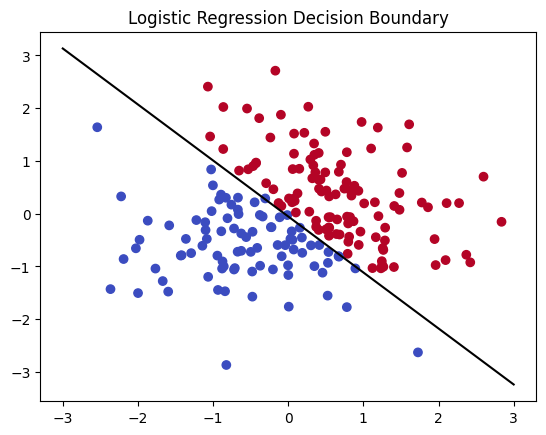

In [18]:
# Step 5: Create classification data
points = np.random.randn(200, 2)
labels = (points[:,0] + points[:,1] > 0).astype(int)

# Step 6: Initialize values
weight = np.zeros(2)
bias = 0
rate = 0.5

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 7: Train model
for i in range(300):
    linear = points @ weight + bias
    pred = sigmoid(linear)
    
    wgrad = points.T @ (pred - labels) / len(labels)
    bgrad = np.mean(pred - labels)
    
    weight -= rate * wgrad
    bias -= rate * bgrad

# Step 8: Visualize decision boundary
xline = np.linspace(-3, 3, 100)
yline = -(weight[0]*xline + bias) / weight[1]

plt.scatter(points[:,0], points[:,1], c=labels, cmap="coolwarm")
plt.plot(xline, yline, color="black")
plt.title("Logistic Regression Decision Boundary")
plt.show()


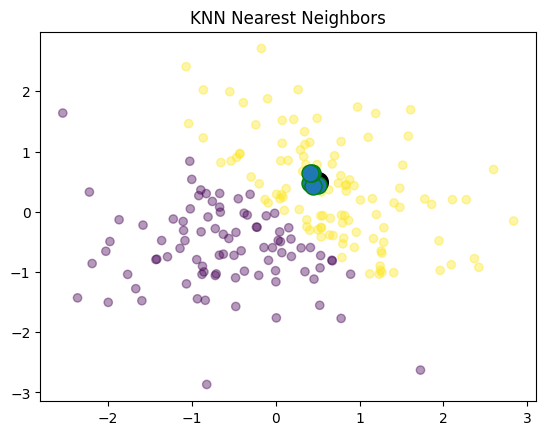

In [19]:
# Step 9: New test point
testpoint = np.array([[0.5, 0.5]])

# Step 10: Compute distances
distances = np.sqrt(((points - testpoint) ** 2).sum(axis=1))

# Step 11: Pick nearest neighbors
k = 5
nearest = np.argsort(distances)[:k]

# Step 12: Visualize
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.4)
plt.scatter(testpoint[0,0], testpoint[0,1], color="black", s=200)
plt.scatter(points[nearest,0], points[nearest,1], edgecolor="green", s=150)
plt.title("KNN Nearest Neighbors")
plt.show()


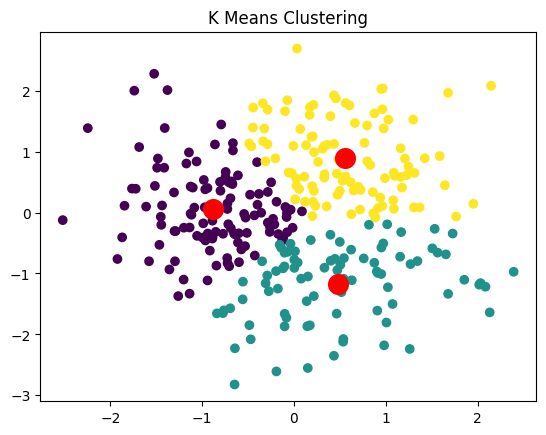

In [20]:
# Step 13: Create data
clusterdata = np.random.randn(300, 2)

# Step 14: Initialize centers
centers = clusterdata[np.random.choice(300, 3, replace=False)]

# Step 15: Train clustering
for i in range(10):
    distance = np.linalg.norm(clusterdata[:,None] - centers, axis=2)
    groups = np.argmin(distance, axis=1)
    
    for j in range(3):
        centers[j] = clusterdata[groups == j].mean(axis=0)

# Step 16: Plot clusters
plt.scatter(clusterdata[:,0], clusterdata[:,1], c=groups, cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], color="red", s=200)
plt.title("K Means Clustering")
plt.show()


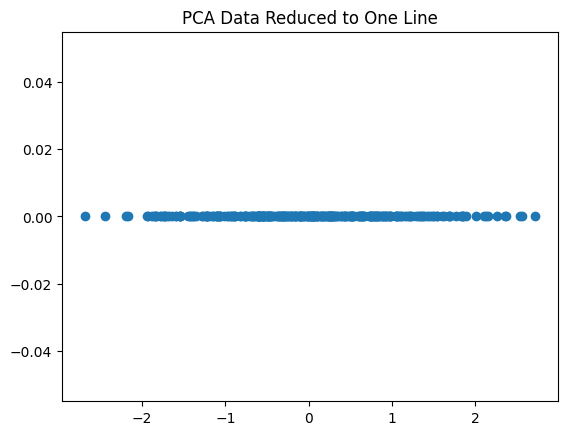

In [21]:
# Step 17: Center data
mean = np.mean(clusterdata, axis=0)
centered = clusterdata - mean

# Step 18: Covariance and eigen vectors
cov = np.cov(centered.T)
values, vectors = np.linalg.eig(cov)

# Step 19: Project to 1D
mainvector = vectors[:, np.argmax(values)]
projected = centered @ mainvector

# Step 20: Plot result
plt.scatter(projected, np.zeros_like(projected))
plt.title("PCA Data Reduced to One Line")
plt.show()
